In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D


In [2]:
df = pd.read_csv("Cleaned Data.csv")
df

,Unnamed: 0,price,airline_name,departure_city,arrival_city,travel_date,duration,stops,cabin_class,booking_date,days_until_travel,booking_type,travel_type
0,0,29384.18,Air India,Delhi,Mumbai,2024-12-25,130,Direct,Business,2024-12-16,9,Moderate,Holiday
1,1,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday
2,2,37417.30,Air India,Delhi,Mumbai,2024-12-25,125,Direct,Business,2024-12-16,9,Moderate,Holiday
3,3,29384.18,Air India,Delhi,Mumbai,2024-12-25,135,Direct,Business,2024-12-16,9,Moderate,Holiday
4,4,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,3887,22384.00,Air India,Kolkata,Guwahathi,2025-02-09,1220,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend
3888,3888,19497.00,Air India,Kolkata,Guwahathi,2025-02-09,1545,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend
3889,3889,42707.00,Air India,Kolkata,Guwahathi,2025-02-09,660,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend
3890,3890,42203.00,Air India,Kolkata,Guwahathi,2025-02-09,775,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend


In [88]:
df["arrival_city"].unique()

array(['Mumbai', 'Kolkata', 'Hyderabad', 'Goa', 'Banglore', 'Guwahathi'],
      dtype=object)

In [3]:
df.shape

(3892, 13)

In [43]:
df.dtypes

price                float64
airline_name          object
departure_city        object
arrival_city          object
travel_date           object
duration               int64
stops                 object
cabin_class           object
booking_date          object
days_until_travel      int64
booking_type          object
travel_type           object
dtype: object

In [44]:
df.corr()

,price,duration,days_until_travel
price,1.000000,0.358968,-0.164010
duration,0.358968,1.000000,-0.025208
days_until_travel,-0.164010,-0.025208,1.000000


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)


# Here i am dropping Unnamed column as it is unwanted column

In [91]:
df[(df["arrival_city"] == "Goa") & (df["departure_city"] == "Mumbai")]

,price,airline_name,departure_city,arrival_city,travel_date,duration,stops,cabin_class,booking_date,days_until_travel,booking_type,travel_type
431,24925.43,Air India,Mumbai,Goa,2024-12-25,80,Direct,Business,2024-12-16,9,Moderate,Holiday
432,53567.00,Air India,Mumbai,Goa,2024-12-25,265,Direct,Business,2024-12-16,9,Moderate,Holiday
433,38111.00,Air India,Mumbai,Goa,2024-12-25,475,1 stop,Business,2024-12-16,9,Moderate,Holiday
434,39058.00,Air India,Mumbai,Goa,2024-12-25,510,1 stop,Business,2024-12-16,9,Moderate,Holiday
435,38111.00,Air India,Mumbai,Goa,2024-12-25,965,1 stop,Business,2024-12-16,9,Moderate,Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...
3596,10666.00,Air India,Mumbai,Goa,2025-02-09,1410,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend
3597,16338.00,Air India,Mumbai,Goa,2025-02-09,840,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend
3598,17617.00,Air India,Mumbai,Goa,2025-02-09,765,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend
3599,14073.00,Air India,Mumbai,Goa,2025-02-09,1160,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend


In [6]:
df.tail()

,price,airline_name,departure_city,arrival_city,travel_date,duration,stops,cabin_class,booking_date,days_until_travel,booking_type,travel_type
3887,22384.0,Air India,Kolkata,Guwahathi,2025-02-09,1220,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend
3888,19497.0,Air India,Kolkata,Guwahathi,2025-02-09,1545,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend
3889,42707.0,Air India,Kolkata,Guwahathi,2025-02-09,660,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend
3890,42203.0,Air India,Kolkata,Guwahathi,2025-02-09,775,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend
3891,65163.0,Air India,Kolkata,Guwahathi,2025-02-09,625,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3892 entries, 0 to 3891
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              3892 non-null   float64
 1   airline_name       3892 non-null   object 
 2   departure_city     3892 non-null   object 
 3   arrival_city       3892 non-null   object 
 4   travel_date        3892 non-null   object 
 5   duration           3892 non-null   int64  
 6   stops              3892 non-null   object 
 7   cabin_class        3892 non-null   object 
 8   booking_date       3892 non-null   object 
 9   days_until_travel  3892 non-null   int64  
 10  booking_type       3892 non-null   object 
 11  travel_type        3892 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 365.0+ KB


In [8]:
df.describe(include="number")

,price,duration,days_until_travel
count,3892.000000,3892.000000,3892.000000
mean,30434.573099,425.412384,24.342497
std,29713.645818,362.888379,18.421048
min,2682.000000,70.000000,2.000000
25%,10554.100000,155.000000,9.000000
50%,19105.110000,345.000000,19.000000
75%,40541.565000,525.000000,41.000000
max,291560.990000,1750.000000,55.000000


In [9]:
df.describe(include="object")

,airline_name,departure_city,arrival_city,travel_date,stops,cabin_class,booking_date,booking_type,travel_type
count,3892,3892,3892,3892,3892,3892,3892,3892,3892
unique,5,5,6,15,4,4,1,3,3
top,Air India,Delhi,Hyderabad,2025-01-01,1 stop,Premium Economy,2024-12-16,Moderate,Weekend
freq,3148,1167,740,422,2168,1358,3892,1727,1345


# Null Value Detection

In [10]:
df.isna().sum()

price                0
airline_name         0
departure_city       0
arrival_city         0
travel_date          0
duration             0
stops                0
cabin_class          0
booking_date         0
days_until_travel    0
booking_type         0
travel_type          0
dtype: int64

# Column Name Integrity Check

In [11]:
df.columns

Index(['price', 'airline_name', 'departure_city', 'arrival_city',
       'travel_date', 'duration', 'stops', 'cabin_class', 'booking_date',
       'days_until_travel', 'booking_type', 'travel_type'],
      dtype='object')

<Axes: xlabel='count', ylabel='travel_type'>

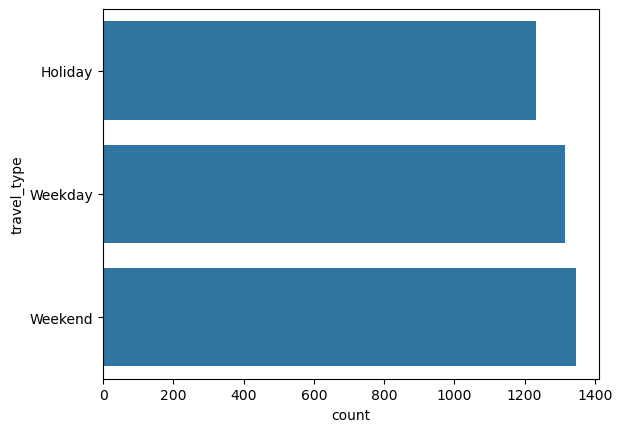

In [12]:
sns.countplot(data = df,y = df["travel_type"])

In [13]:
df["travel_type"].value_counts()

Weekend    1345
Weekday    1314
Holiday    1233
Name: travel_type, dtype: int64

In [98]:
import plotly.graph_objects as go

y = [1345, 1314, 1233]
labels = ["Weekend", "Weekday", "Holiday"]
myexplode = [0.1, 0, 0]

fig = go.Figure(data=[go.Pie(labels=labels, values=y, pull=myexplode)])

fig.update_layout(title="Travel Type Distribution", title_x=0.5)

fig.show()


In [99]:
import plotly.graph_objects as go

y = [1345, 1314, 1233]
labels = ["Weekend", "Weekday", "Holiday"]
myexplode = [0, 0.1, 0]

# Define custom colors
colors = ['#FF6347', '#1E90FF', '#32CD32']

fig = go.Figure(data=[go.Pie(labels=labels, values=y, pull=myexplode, marker=dict(colors=colors))])

fig.update_layout(title="Travel Type Distribution", title_x=0.5)

fig.show()


**Bivariate analysis air_line_name vs prices**

Text(0.5, 1.0, 'Ticket Price Distribution by Airline')

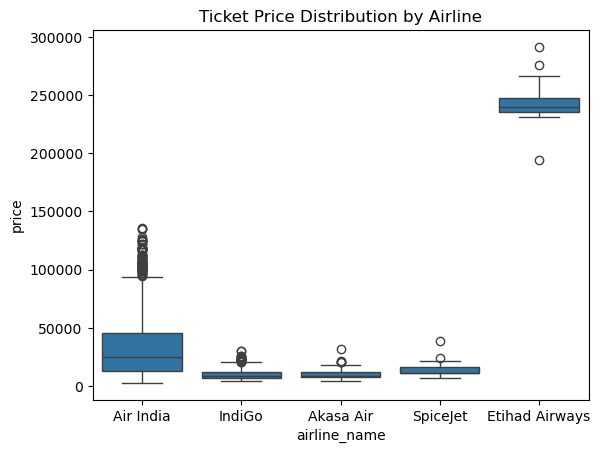

In [106]:
sns.boxplot(x='airline_name', y='price', data=df)
plt.title('Ticket Price Distribution by Airline')
 

In [122]:
df.groupby(["travel_type","cabin_class"])["price"].describe()

count           mean           std       min  \
travel_type cabin_class                                                     
Holiday     Business         371.0   56484.640782  22521.790017  19799.00   
            Economy          442.0   11019.036244   5622.406371   3592.77   
            First              7.0  167625.431429  98619.350173  58915.45   
            Premium Economy  413.0   22938.894843  11765.581856   9399.00   
Weekday     Business         429.0   56444.361189  24650.005166  19799.00   
            Economy          400.0   10040.651925   5542.023993   3161.00   
            First             11.0  160480.415455  95034.822214  58902.99   
            Premium Economy  474.0   22906.671097  17857.406063   6865.44   
Weekend     Business         425.0   54994.680259  23312.957581  19799.00   
            Economy          431.0    9892.338144   4571.112476   2682.00   
            First             18.0  182474.620000  89360.881619  58889.63   
            Premium Economy  471.0   21662.808408  14316.973866   6867.23   

                                    25%         50%          75%        max  
travel_type cabin_class                                                      
Holiday     Business         37395.4800   54574.930   70241.5000  124478.00  
            Economy           7815.8500    9878.265   12439.4775   48040.00  
            First            64163.4000  239140.640  244691.5950  257611.94  
            Premium Economy  14468.0000   19665.440   27609.0000   80363.00  
Weekday     Business         37876.6200   52938.000   70475.0000  135446.00  
            Economy           6481.0000    8137.850   11740.6925   38984.00  
            First            64065.9000  231120.790  237774.9100  275896.07  
            Premium Economy  11920.0000   17445.320   24474.7500  125368.00  
Weekend     Business         37386.1300   47217.000   68956.0000  124607.00  
            Economy           6590.0000    8440.750   11492.4700   25781.94  
            First            64150.4925  233313.565  242956.2375  291560.99  
            Premium Economy  12468.1250   17818.580   24394.5000  124607.00

<Axes: xlabel='cabin_class', ylabel='count'>

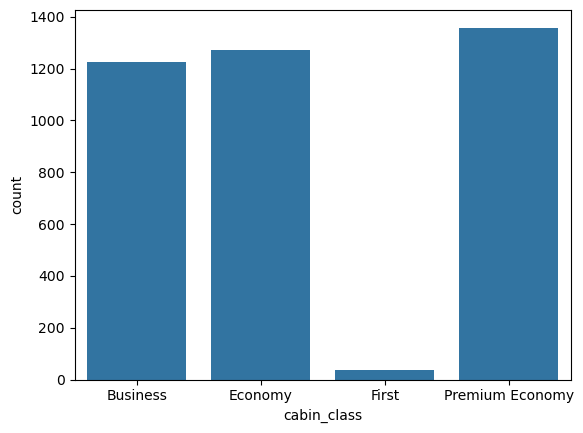

In [14]:
sns.countplot(data = df,x = "cabin_class")

In [15]:
df["cabin_class"].value_counts()

Premium Economy    1358
Economy            1273
Business           1225
First                36
Name: cabin_class, dtype: int64

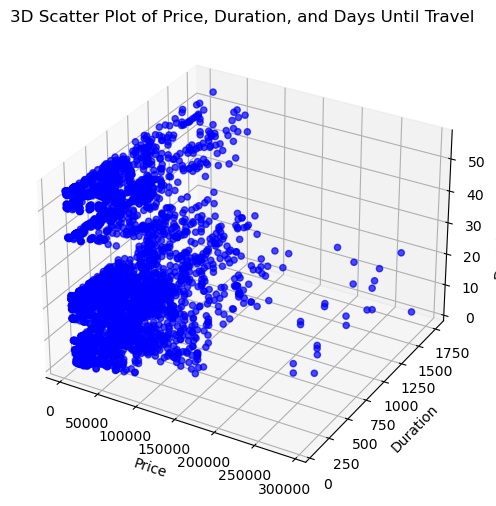

In [17]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 3D Scatter
ax.scatter(df['price'], df['duration'], df['days_until_travel'], c='blue', marker='o', alpha=0.7)
ax.set_title('3D Scatter Plot of Price, Duration, and Days Until Travel')
ax.set_xlabel('Price')
ax.set_ylabel('Duration')
ax.set_zlabel('Days Until Travel')
plt.show()

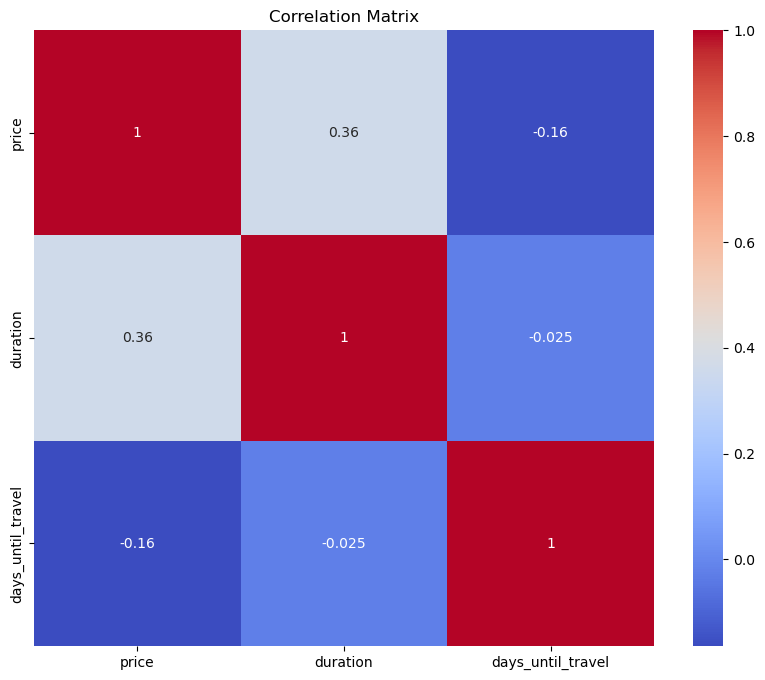

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Uni variate Analysis

-  **We can say for diffrent cabin_class we are getting diffrent summary statistics of prices from the observation**

In [56]:
df.groupby("cabin_class")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
cabin_class,,,,,,,,
Business,1225.0,55953.609624,23549.041730,19799.00,37405.7200,49612.36,69998.0000,135446.00
Economy,1273.0,10330.143386,5283.348968,2682.00,6749.0000,8745.07,12190.0000,48040.00
First,36.0,172866.826389,90705.742224,58889.63,64125.3375,231294.41,240552.3425,291560.99
Premium Economy,1358.0,22485.057754,14984.457729,6865.44,12871.6100,18046.50,25170.4375,125368.00


<Axes: xlabel='price', ylabel='Density'>

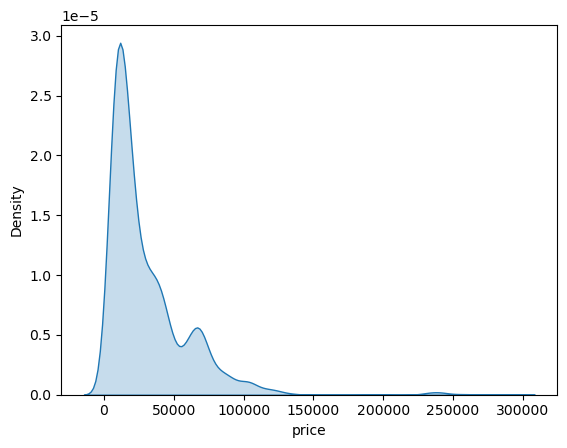

In [57]:
sns.kdeplot(data=df,x="price",fill=True)

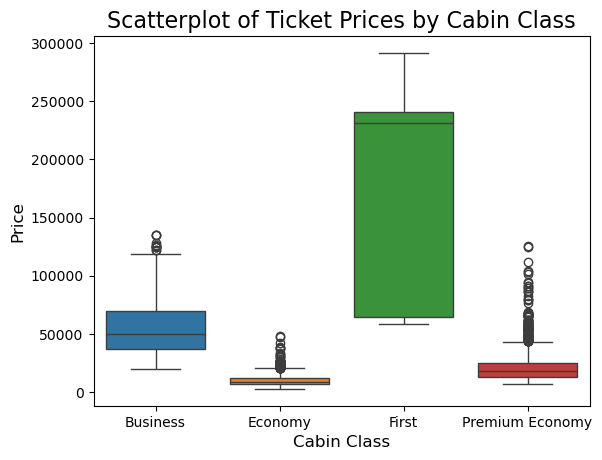

In [63]:
sns.boxplot(x='cabin_class', y='price', data=df, hue='cabin_class')
plt.title('Scatterplot of Ticket Prices by Cabin Class', fontsize=16)
plt.xlabel('Cabin Class', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()


- Price Distribution: Prices increase progressively from Economy to Premium Economy, Business, and First Class.
- Outliers: First Class and Business Class have more outliers compared to Economy and Premium Economy.
- Variability: First Class has the widest range of ticket prices, showing the greatest variability

### Duration: Analyze the average and most frequent travel durations. Check for unusually long/short durations.

In [25]:
df["duration"].describe()

count    3892.000000
mean      425.412384
std       362.888379
min        70.000000
25%       155.000000
50%       345.000000
75%       525.000000
max      1750.000000
Name: duration, dtype: float64

- The longest travel duration in the dataset is `1,750` minutes, recorded for the journey from `Mumbai to Goa`.

In [26]:
df[df["duration"] == df["duration"].max()]

,price,airline_name,departure_city,arrival_city,travel_date,duration,stops,cabin_class,booking_date,days_until_travel,booking_type,travel_type
444,118410.0,Air India,Mumbai,Goa,2024-12-25,1750,1 stop,Business,2024-12-16,9,Moderate,Holiday


In [83]:
df[df["duration"] == df["duration"].min()].head(1)

,price,airline_name,departure_city,arrival_city,travel_date,duration,stops,cabin_class,booking_date,days_until_travel,booking_type,travel_type
713,10975.83,IndiGo,Kolkata,Guwahathi,2024-12-25,70,Direct,Economy,2024-12-16,9,Moderate,Holiday


- The shortest travel duration in the dataset is `70` minutes, recorded for the journey from `kolkata` to `Guhawathi`.

### Airline Name: Find the most and least frequent airlines.


In [78]:
df["airline_name"].value_counts()

Air India         3148
IndiGo             637
Akasa Air           55
SpiceJet            30
Etihad Airways      22
Name: airline_name, dtype: int64

- Air India has the highest count with 3,148 flights indicating its dominant presence in the dataset
- Etihad Airways has lowest 22 flights 

# Cabin Class: Identify which cabin class (e.g., Economy, Business) is most frequently booked.

In [29]:
df["cabin_class"].value_counts()

Premium Economy    1358
Economy            1273
Business           1225
First                36
Name: cabin_class, dtype: int64

-  Premium Economy leads with 1,358 tickets
- First Class has the fewest, with only 36 tickets.

### Travel Type: Check the proportions of "Holiday," "Weekend," etc., travel purposes.

In [30]:
df["travel_type"].value_counts()

Weekend    1345
Weekday    1314
Holiday    1233
Name: travel_type, dtype: int64

- Weekend has the highest with 1,345, followed by Weekday at 1,314, and Holiday with 1,233."

### Booking Type Analyzing the split between Moderate, Advanced, etc., booking types.

In [31]:
df["booking_type"].value_counts()

Moderate       1727
Advanced       1266
Last-minute     899
Name: booking_type, dtype: int64

- Moderate bookings lead with 1,727, followed by Advanced at 1,266, and Last-minute with 899."

# Visualizations

<Axes: >

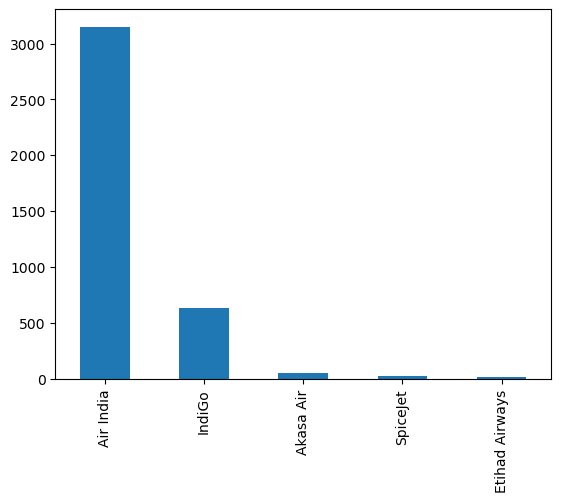

In [32]:
df["airline_name"].value_counts().plot(kind="bar")

- Air India has the highest count with 3,148 flights indicating its dominant presence in the dataset Etihad Airways has lowest 22 flights

<Axes: >

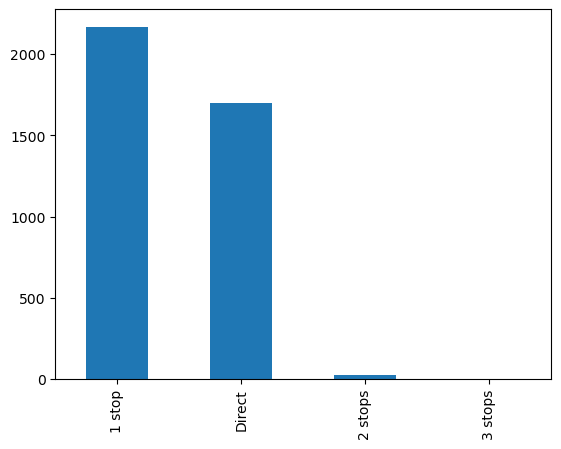

In [33]:
df["stops"].value_counts().plot(kind="bar")

In [34]:
df["stops"].value_counts()

1 stop     2168
Direct     1701
2 stops      22
3 stops       1
Name: stops, dtype: int64

 - 1 stop flights are the most common with **2,168**, followed by Direct flights at 1,701. There are only **22** flights with 2 stops, and 3 stops have the fewest, with just 1 flight.

In [1]:
df["cabin_class"].value_counts(normalize=True).plot(kind="bar")

NameError: name 'df' is not defined

In [36]:
df["cabin_class"].value_counts()

Premium Economy    1358
Economy            1273
Business           1225
First                36
Name: cabin_class, dtype: int64

- Premium Economy leads with 1,358 tickets, followed by Economy with 1,273 tickets. Business comes next with 1,225 tickets, and First Class has the fewest with only 36 tickets."

<Axes: >

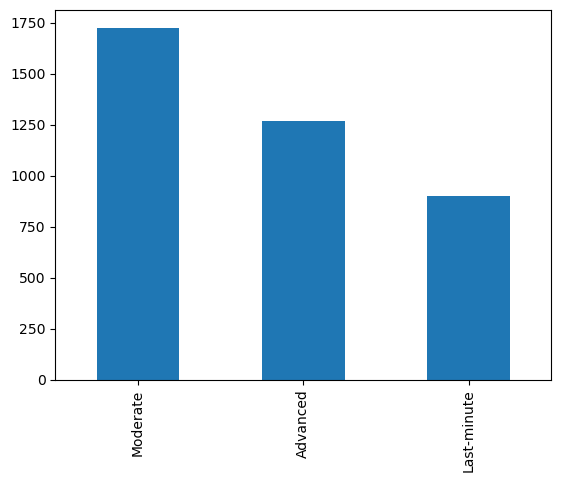

In [37]:
df["booking_type"].value_counts().plot(kind="bar")

In [38]:
df["booking_type"].value_counts()

Moderate       1727
Advanced       1266
Last-minute     899
Name: booking_type, dtype: int64

- Moderate bookings lead with 1,727, followed by Advanced with 1,266, and Last-minute bookings have the lowest count at 899.

# Outliers Visualization

<Axes: >

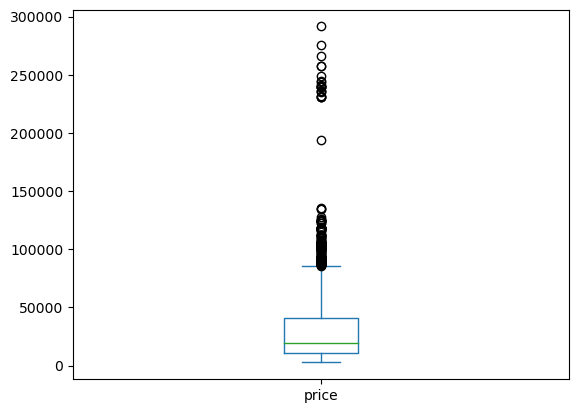

In [39]:
df["price"].plot(kind = "box")  #36 outliers

# Bivariate Analysis

In [40]:
df.corr()

,price,duration,days_until_travel
price,1.000000,0.358968,-0.164010
duration,0.358968,1.000000,-0.025208
days_until_travel,-0.164010,-0.025208,1.000000


In [41]:
pd.crosstab(df["duration"],df["stops"],margins=True)

stops,1 stop,2 stops,3 stops,Direct,All
duration,,,,,
70,4,0,0,56,60
75,3,0,0,170,173
80,1,0,0,123,124
85,0,0,0,14,14
90,0,0,0,5,5
...,...,...,...,...,...
1700,5,0,0,0,5
1725,3,0,0,0,3
1735,8,0,0,0,8


In [42]:
pd.crosstab(df["travel_type"],df["cabin_class"],margins=True)

cabin_class,Business,Economy,First,Premium Economy,All
travel_type,,,,,
Holiday,371,442,7,413,1233
Weekday,429,400,11,474,1314
Weekend,425,431,18,471,1345
All,1225,1273,36,1358,3892


- Business Class sees slightly higher usage on weekdays, likely for corporate travel.
- Premium Economy is consistently preferred across all travel types.
- First Class is rarely chosen, indicating low demand.

In [23]:
df["price"].kurtosis()

# A kurtosis of 14.7 means ticket prices have extreme outliers,
#with some very high prices likely from premium or last-minute bookings.

14.713398591912048

In [26]:
df["price"].skew()

#A skewness of 2.87 indicates that ticket prices are positively skewed, 
# meaning most prices are lower, but a few very high prices (outliers) pull the distribution to the right.

2.8759902157911044